In [1]:
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

class ArmedBandit:
    def __init__(self, k=10, mean=0, start_equal=False):
        if not start_equal:
            self.action_values = np.random.normal(loc=mean, scale=1, size=k)
        else:
            action_value = np.random.normal(0, 1)
            self.action_values = np.array([action_value for _ in range(k)])
    def get_reward(self, action):
        return np.random.normal(loc=self.action_values[action], scale=1)
    
    def update_action_values(self, mean=0, sd=0.01):
        self.action_values += np.random.normal(loc=mean, scale=sd, size=len(self.action_values))

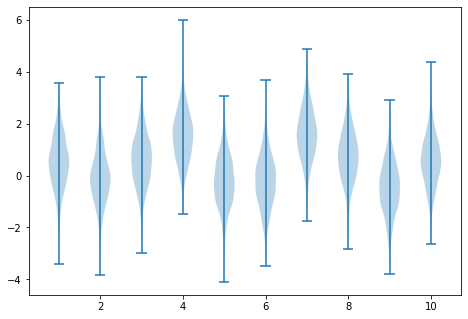

In [2]:
# Figure 2.1, 10 armed bandits test suit


np.random.seed(42)

RUNS = 2000
ACTIONS = 10

data_to_plot = np.zeros((RUNS,ACTIONS))
armed_bandit = ArmedBandit()
for run in range(RUNS):
    for action in range(ACTIONS):
        data_to_plot[run][action] = armed_bandit.get_reward(action)

        
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.violinplot(data_to_plot)
plt.show()

In [3]:
RUNS = 2000
STEPS = 1000
bandits = ACTIONS

def run_e_greedy(episolon):
    means = np.zeros(STEPS)
    optimal = np.zeros(STEPS)
    
    for run in range(RUNS):
        
        # Algorithm suggested on 2.4
        Q = np.zeros(ACTIONS)
        N = np.zeros(ACTIONS)
        armed_bandit = ArmedBandit()

        for step in range(STEPS):
            a = np.argmax(Q) if random.random() < 1 - episolon else random.randint(0, ACTIONS-1)
            r = armed_bandit.get_reward(a)
            N[a] += 1
            Q[a] = Q[a] + ((1.0/N[a])*(r - Q[a]))

        # End of algorithm 
            
            # this is just plot data
            
            means[step] += r
            optimal[step] += 1 if np.argmax(armed_bandit.action_values) == a else 0

    means = means/RUNS
    optimal = optimal/RUNS
    
    return means, optimal

means0, optimal0 = run_e_greedy(0)
means01, optimal01 = run_e_greedy(0.1)
means001, optimal001 = run_e_greedy(0.01)

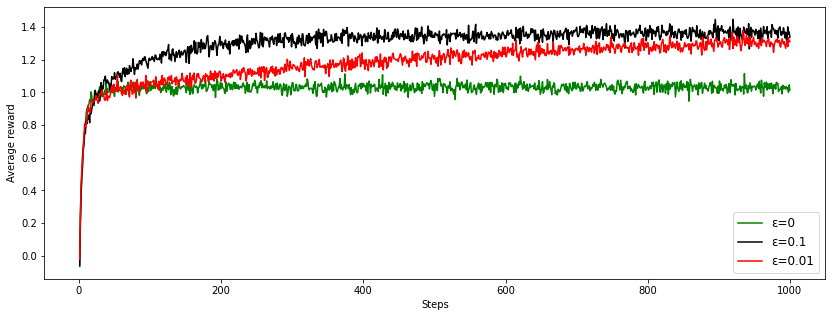

In [4]:
%matplotlib inline
plt.figure(figsize=(14,5))
plt.plot([k+1 for k in range(STEPS)], means0, color='green', label='ε=0')
plt.plot([k+1 for k in range(STEPS)], means01, color='black', label='ε=0.1')
plt.plot([k+1 for k in range(STEPS)], means001, color='red', label='ε=0.01')

plt.legend(loc=4, prop={'size': 12})
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.show()

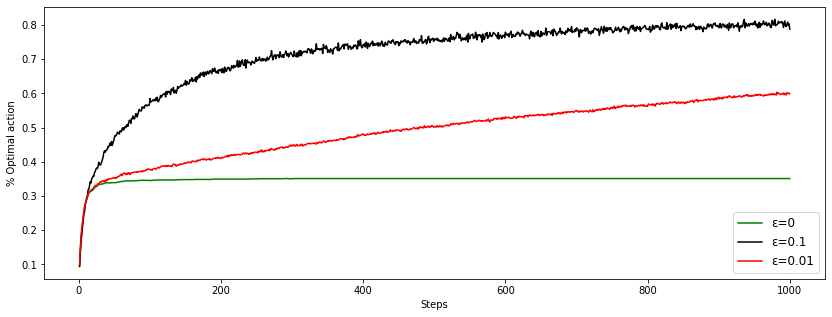

In [5]:
plt.figure(figsize=(14,5))
plt.plot([k+1 for k in range(STEPS)], optimal0, color='green', label='ε=0')
plt.plot([k+1 for k in range(STEPS)], optimal01, color='black', label='ε=0.1')
plt.plot([k+1 for k in range(STEPS)], optimal001, color='red', label='ε=0.01')
plt.legend(loc=4, prop={'size': 12})
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.show()

In [6]:
# Exercise 2.5

ALPHA = 0.1
RUNS = 2000
STEPS = 10000
def run_e_greedy_nonstationary(episolon):
    means = np.zeros(STEPS)
    optimal = np.zeros(STEPS)
    
    for run in range(RUNS):
        
        # Algorithm suggested on 2.4
        Q = np.zeros(ACTIONS)
        N = np.zeros(ACTIONS)
        armed_bandit = ArmedBandit(start_equal=True)

        for step in range(STEPS):
            a = np.argmax(Q) if random.random() < 1 - episolon else random.randint(0, ACTIONS-1)
            r = armed_bandit.get_reward(a)
            N[a] += 1
            Q[a] = Q[a] + ALPHA*(r - Q[a])
            
            means[step] += r
            optimal[step] += 1 if np.argmax(armed_bandit.action_values) == a else 0
            armed_bandit.update_action_values()

    means = means/RUNS
    optimal = optimal/RUNS
    
    return means, optimal

means0_nonstat, optimal0_nonstat = run_e_greedy_nonstationary(0)
means01_nonstat, optimal01_nonstat = run_e_greedy_nonstationary(0.1)
means001_nonstat, optimal001_nonstat = run_e_greedy_nonstationary(0.01)

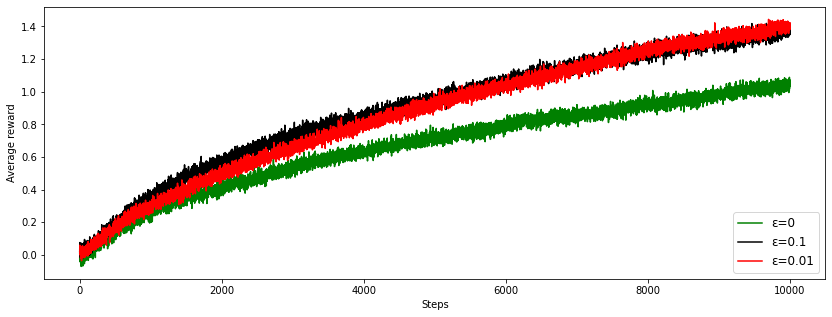

In [7]:
%matplotlib inline
plt.figure(figsize=(14,5))
plt.plot([k+1 for k in range(STEPS)], means0_nonstat, color='green', label='ε=0')
plt.plot([k+1 for k in range(STEPS)], means01_nonstat, color='black', label='ε=0.1')
plt.plot([k+1 for k in range(STEPS)], means001_nonstat, color='red', label='ε=0.01')

plt.legend(loc=4, prop={'size': 12})
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.show()

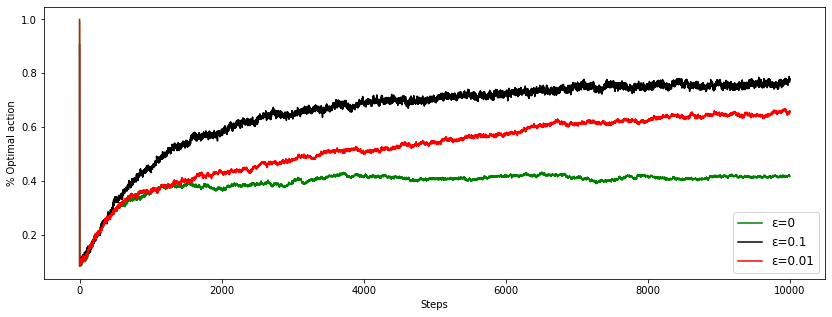

In [8]:
plt.figure(figsize=(14,5))
plt.plot([k+1 for k in range(STEPS)], optimal0_nonstat, color='green', label='ε=0')
plt.plot([k+1 for k in range(STEPS)], optimal01_nonstat, color='black', label='ε=0.1')
plt.plot([k+1 for k in range(STEPS)], optimal001_nonstat, color='red', label='ε=0.01')
plt.legend(loc=4, prop={'size': 12})
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.show()

In [9]:
RUNS = 2000
STEPS = 1000
bandits = ACTIONS

# CHAPTER 2.6 -> Optimistic values

def run_e_greedy_alpha(episolon, alpha=0.1, start_value=0.0):
    means = np.zeros(STEPS)
    optimal = np.zeros(STEPS)
    
    for run in range(RUNS):
        
        # Algorithm suggested on 2.4
        Q = np.full(ACTIONS, start_value)
        N = np.zeros(ACTIONS)
        armed_bandit = ArmedBandit()

        for step in range(STEPS):
            a = np.argmax(Q) if random.random() < 1 - episolon else random.randint(0, ACTIONS-1)
            r = armed_bandit.get_reward(a)
            N[a] += 1
            Q[a] = Q[a] + alpha*(r - Q[a])

        # End of algorithm 
            
            # this is just plot data
            
            means[step] += r
            optimal[step] += 1 if np.argmax(armed_bandit.action_values) == a else 0

    means = means/RUNS
    optimal = optimal/RUNS
    
    return means, optimal


_, optimal0_optmistic = run_e_greedy_alpha(0, start_value=5.0)
_, optimal01 = run_e_greedy_alpha(0.1)

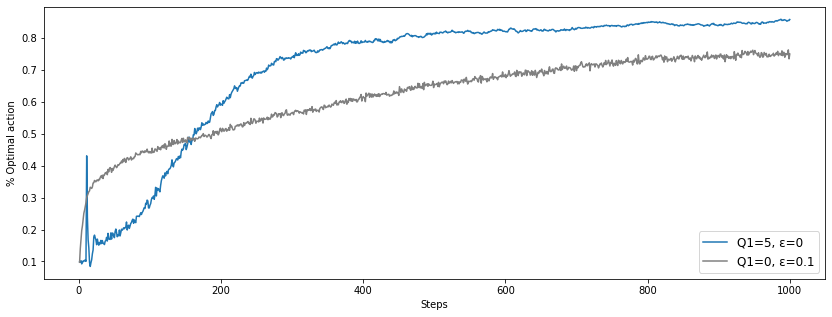

In [10]:
plt.figure(figsize=(14,5))
plt.plot([k+1 for k in range(STEPS)], optimal0_optmistic, label='Q1=5, ε=0')
plt.plot([k+1 for k in range(STEPS)], optimal01, color='grey', label='Q1=0, ε=0.1')

plt.legend(loc=4, prop={'size': 12})
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.show()

In [11]:
#CHAPTER 2.7 -> Upper confidence value

def run_UCB(c, alpha=0.1, start_value = 0.0):
    means = np.zeros(STEPS)
    optimal = np.zeros(STEPS)
    
    for run in range(RUNS):
        
        # Algorithm suggested on 2.4
        Q = np.full(ACTIONS, start_value)
        N = np.zeros(ACTIONS)
        armed_bandit = ArmedBandit()

        for step in range(STEPS):
            a = np.argmax(Q + c*np.sqrt(np.log(step)/N))
            r = armed_bandit.get_reward(a)
            N[a] += 1
            Q[a] = Q[a] + (1.0/N[a])*(r - Q[a])
            
            means[step] += r
            optimal[step] += 1 if np.argmax(armed_bandit.action_values) == a else 0

    means = means/RUNS
    optimal = optimal/RUNS
    
    return means, optimal

reward_UCB2, _ = run_UCB(2)
reward01, _ = run_e_greedy(0.1)

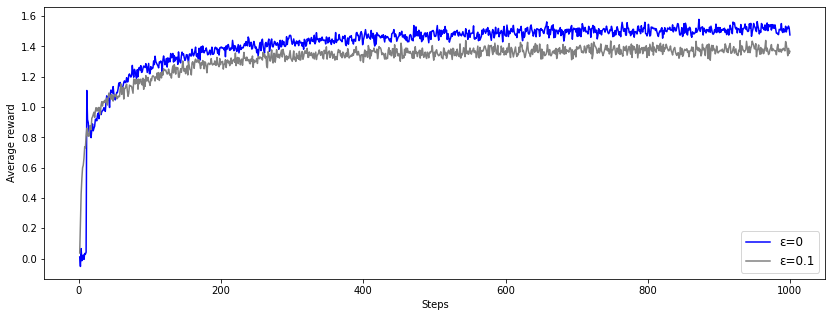

In [12]:
%matplotlib inline
plt.figure(figsize=(14,5))
plt.plot([k+1 for k in range(STEPS)], reward_UCB2, color='blue', label='ε=0')
plt.plot([k+1 for k in range(STEPS)], reward01, color='grey', label='ε=0.1')


plt.legend(loc=4, prop={'size': 12})
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.show()

In [13]:
#CHAPTER 2.8 -> Gradient Ascendent

def softmax(H):
    den = np.sum(np.exp(H))
    out = np.zeros(len(H))
    for k in range(len(H)):
        out[k] = np.exp(H[k])
    return out/den

def run_GA(mean=4.0, alpha=0.1, baseline=False):
    means = np.zeros(STEPS)
    optimal = np.zeros(STEPS)
    
    for run in range(RUNS):
        
        # Algorithm suggested on 2.4
        H = np.zeros(ACTIONS)
        N = np.zeros(ACTIONS)
        R = 0
        armed_bandit = ArmedBandit(mean=mean)

        for step in range(STEPS):
            probs = softmax(H)
            a = np.random.choice(np.arange(0,10), p=probs)
            r = armed_bandit.get_reward(a)

            N[a] += 1
            R += r
            Rt_mean = R/np.sum(N) if baseline else 0
            for act in range(len(H)):
                H[act] = H[act] + alpha*(r - Rt_mean)*(1 - probs[act]) if act == a else H[act] - alpha*(r - Rt_mean)*(probs[act])
            
            means[step] += r
            optimal[step] += 1 if np.argmax(armed_bandit.action_values) == a else 0

    means = means/RUNS
    optimal = optimal/RUNS
    
    return means, optimal

_, optimal01_false = run_GA(alpha=0.1, baseline=False)
_, optimal01_true = run_GA(alpha=0.1, baseline=True)
_, optimal04_false = run_GA(alpha=0.4, baseline=False)
_, optimal04_true = run_GA(alpha=0.4, baseline=True)
    

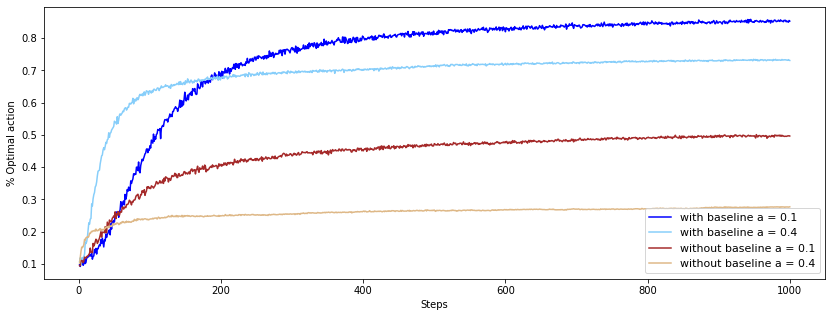

In [14]:
plt.figure(figsize=(14,5))
plt.plot([k+1 for k in range(STEPS)], optimal01_true, color='blue', label='with baseline a = 0.1')
plt.plot([k+1 for k in range(STEPS)], optimal04_true, color='lightskyblue', label='with baseline a = 0.4')
plt.plot([k+1 for k in range(STEPS)], optimal01_false, color='brown', label='without baseline a = 0.1')
plt.plot([k+1 for k in range(STEPS)], optimal04_false, color='burlywood', label='without baseline a = 0.4')
plt.legend(loc=4, prop={'size': 11})
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.show()

In [15]:
RUNS = 2000
epsilon_variation = np.array([1./128., 1./64., 1./32., 1./16., 1./8., 1./4.,])
epsilon_rewards = np.zeros(epsilon_variation.shape)

for i in range(len(epsilon_variation)):
    reward, _ = run_e_greedy(epsilon_variation[i])
    epsilon_rewards[i] = np.mean(reward)

In [16]:
ga_variation = np.array([1./32., 1./16., 1./8., 1./4., 1./2., 1., 2., 3.])
ga_rewards = np.zeros(ga_variation.shape)

for i in range(len(ga_variation)):
    reward, _ = run_GA(mean=0, alpha=ga_variation[i], baseline=True)
    ga_rewards[i] = np.mean(reward)

In [17]:
ucb_variation = np.array([1./16., 1./8., 1./4., 1./2., 1., 2., 4.])
ucb_rewards = np.zeros(ucb_variation.shape)

for i in range(len(ucb_variation)):
    reward, _ = run_UCB(ucb_variation[i])
    ucb_rewards[i] = np.mean(reward)

In [18]:
greedy_optmistic_variation = np.array([ 1./4., 1./2., 1., 2., 4.])
greedy_optmistic_rewards = np.zeros(greedy_optmistic_variation.shape)

for i in range(len(greedy_optmistic_variation)):
    reward, _ = run_e_greedy_alpha(0, start_value=greedy_optmistic_variation[i])
    greedy_optmistic_rewards[i] = np.mean(reward)

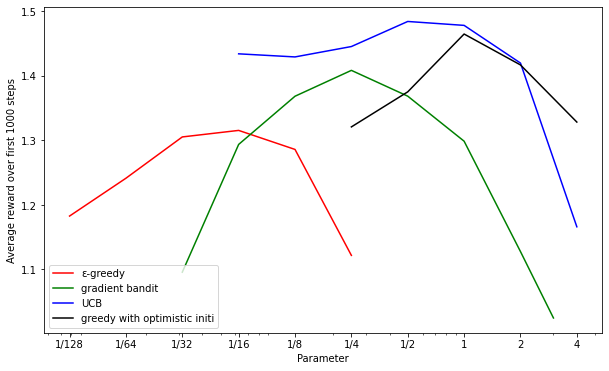

In [19]:
plt.figure(figsize=(10,6))
ax = plt.gca()

ax.set_xscale('log')

plt.xticks(np.array([1./128., 1./64., 1./32., 1./16., 1./8., 1./4., 1./2., 1., 2., 4.]), ('1/128', '1/64', '1/32', '1/16', '1/8', '1/4', '1/2', '1', '2', '4'))

plt.plot(epsilon_variation, epsilon_rewards, color='red', label='ε-greedy')
plt.plot(ga_variation, ga_rewards, color='green', label='gradient bandit')
plt.plot(ucb_variation, ucb_rewards, color='blue', label='UCB')
plt.plot(greedy_optmistic_variation, greedy_optmistic_rewards, color='black', label='greedy with optimistic initi')

plt.legend(loc=3, prop={'size': 10})
plt.xlabel('Parameter')
plt.ylabel('Average reward over first 1000 steps')
plt.show()



## 2.1. The probability of the greedy action will be taken is 1-ε = 0.5 .

2.2. From action A4 to action A5 it definitly occurred because it was getting a positive reward but did a different action, and so, a ε (exploratory) step. And may have happened from action A1 to action A2.  

2.3. The ε=0.01 will outperform 0.1 in the long run. By about 8%, that means the algorithm will converge and will only do the 1% random action, instead of 10% random action (that it does when ε=0.1)

2.4. HM

2.5 code. Done above.

2.6 HMMMM